Introduction:
Most people would assume that rural areas (areas with a very low population density) have a large number of households that earn less than 10k. But could it be the same for suburban areas as well? Metropolitan cities like SF and LA have a large number of "rich" households but poverty is rampant in those cities too. We are going to analyze this in the notebook.

Hypothesis-
Congressional districts with a high population density have a larger ratio of households earning more than 200K AND less than 10k in comparison with districts that have a lower population density.

In [ ]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data. 
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas
import requests 
from bs4 import BeautifulSoup
import re 
from matplotlib.pyplot import figure
import numpy as np
plt.style.use('dark_background')
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# We are reading in the data we want from ACS 2021. The API returns json data. Try copy and pasting the link yourself in a browser to see what the raw data looks like.
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19001_002E,B19001_017E&for=congressional%20district:*&in=state:*"

# store the response of URL
response = urlopen(url)

# storing the JSON response from url in data
data_json = json.loads(response.read())
data_json.pop(0) # the first row of data is header information which we don't need, so pop removes that from the dataset.

# Hand populate the columns based on the variable descriptions census.gov documents here: https://api.census.gov/data/2021/acs/acs1/variables.html. Note they correspond back to the variable names I included in the URL above.
cols = ['District Name','Total Households','Less than $10k', '$200k+', 'State code', 'district number']

acs_df = pd.DataFrame(data_json, columns = cols)

# time to do some basic cleanup of the data. We will need to extract the district number and state in a regular format so we can later join with the party data.
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['district number'] = pd.to_numeric(acs_df['district number'])

acs_df['State'] = acs_df['State'].str.strip()

# Let's just keep the columns we need
acs_df = acs_df[['Total Households', 'Less than $10k', "$200k+", 'district number', 'State']]

# take a look at the top results in the dataset
acs_df.head()

,Total Households,Less than $10k,$200k+,district number,State
0,289474,14153,19390,10,Michigan
1,299804,23793,10899,4,Mississippi
2,278057,27728,19574,14,Michigan
3,306685,19036,12208,1,Michigan
4,285554,26481,12412,3,Mississippi


In [ ]:
# Convert the number columns into number data types so we can math on them
acs_df["Total Households"] = pd.to_numeric(acs_df["Total Households"])
acs_df["Less than $10k"] = pd.to_numeric(acs_df["Less than $10k"])
acs_df['$200k+'] = pd.to_numeric(acs_df['$200k+'])

# Compute some new columns based on the existing columns for later visualization
acs_df['% of households over $200k'] = (100*acs_df['$200k+'])/acs_df['Total Households']
acs_df['% of households less than $10k'] = (100*acs_df['Less than $10k'])/acs_df['Total Households']

New data:

CLusters in order of lowest to highest population density based on congressional districts:
*   Pure rural
*   Rural-suburban mix
*   Sparse Suburban
*   Dense suburban
*   Urban-suburban mix
*   Pure urban












In [ ]:
data = pd.read_excel("AWS data final.xlsx")
data.head()

,CD,Cluster,Very low density,Low density,Medium density,High density
0,AK-AL,Pure rural,0.482993,0.198331,0.229245,0.089431
1,AL-01,Rural-suburban mix,0.365359,0.428878,0.197413,0.008350
2,AL-02,Pure rural,0.535487,0.316148,0.148366,0.000000
3,AL-03,Pure rural,0.540407,0.389348,0.065552,0.004693
4,AL-04,Pure rural,0.695332,0.288942,0.015726,0.000000


Cleaning new data:

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
acs_df['Code'] = acs_df['State'].map(us_state_to_abbrev)
acs_df["CD"] = acs_df["Code"] + '-' +  acs_df["district number"].astype(str)
data['CD'] = data['CD'].str.replace('-0', '-')
data

,CD,Cluster,Very low density,Low density,Medium density,High density
0,AK-AL,Pure rural,0.482993,0.198331,0.229245,0.089431
1,AL-1,Rural-suburban mix,0.365359,0.428878,0.197413,0.008350
2,AL-2,Pure rural,0.535487,0.316148,0.148366,0.000000
3,AL-3,Pure rural,0.540407,0.389348,0.065552,0.004693
4,AL-4,Pure rural,0.695332,0.288942,0.015726,0.000000
...,...,...,...,...,...,...
430,WI-8,Rural-suburban mix,0.413683,0.288429,0.263727,0.034161
431,WV-1,Pure rural,0.514884,0.325892,0.143057,0.016167
432,WV-2,Pure rural,0.501097,0.382036,0.107313,0.009553
433,WV-3,Pure rural,0.676021,0.212421,0.098358,0.013200


Merging old data with the new one:

In [ ]:
acs_df = acs_df.merge(data, on='CD', how='left').drop(['district number', 'Code'], axis=1)
acs_df = acs_df.dropna()
acs_df 

,Total Households,Less than $10k,$200k+,State,% of households over $200k,% of households less than $10k,CD,Cluster,Very low density,Low density,Medium density,High density
0,289474,14153,19390,Michigan,6.698356,4.889213,MI-10,Rural-suburban mix,0.360645,0.300809,0.310588,0.027958
1,299804,23793,10899,Mississippi,3.635375,7.936185,MS-4,Rural-suburban mix,0.437148,0.434194,0.128658,0.000000
2,278057,27728,19574,Michigan,7.039564,9.972056,MI-14,Dense suburban,0.000124,0.103207,0.547556,0.349113
3,306685,19036,12208,Michigan,3.980632,6.207020,MI-1,Pure rural,0.709264,0.237771,0.040811,0.012154
4,285554,26481,12412,Mississippi,4.346638,9.273552,MS-3,Pure rural,0.601601,0.323127,0.075272,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
432,297714,15159,18947,Missouri,6.364162,5.091800,MO-6,Rural-suburban mix,0.410802,0.407193,0.182005,0.000000
433,320905,19373,14584,Missouri,4.544647,6.036989,MO-7,Rural-suburban mix,0.409168,0.380741,0.186981,0.023111
434,282817,24427,8871,Michigan,3.136657,8.637034,MI-5,Sparse suburban,0.231431,0.412331,0.309095,0.047143
435,287908,17508,15476,Michigan,5.375328,6.081109,MI-6,Rural-suburban mix,0.457808,0.372611,0.144497,0.025084


In [ ]:
# Checking Unique Clusters

acs_df['Cluster'].unique() 

array(['Rural-suburban mix', 'Dense suburban', 'Pure rural',
       'Urban-suburban mix', 'Sparse suburban', 'Pure urban'],
      dtype=object)

In [ ]:
# Group By and rearrange rows

include_these = ['% of households less than $10k','% of households over $200k']
group_df = acs_df.groupby('Cluster')[include_these].mean() 
final_df = group_df.reset_index()  
final_df = final_df.reindex([1,3,4,0,5,2])
final_df 

,Cluster,% of households less than $10k,% of households over $200k
1,Pure rural,7.020484,4.879478
3,Rural-suburban mix,5.935271,7.012401
4,Sparse suburban,4.980596,12.314259
0,Dense suburban,5.838193,10.824865
5,Urban-suburban mix,6.119051,14.152386
2,Pure urban,7.849991,13.034224


Visualizing the data to prove/disprove the hypothesis:

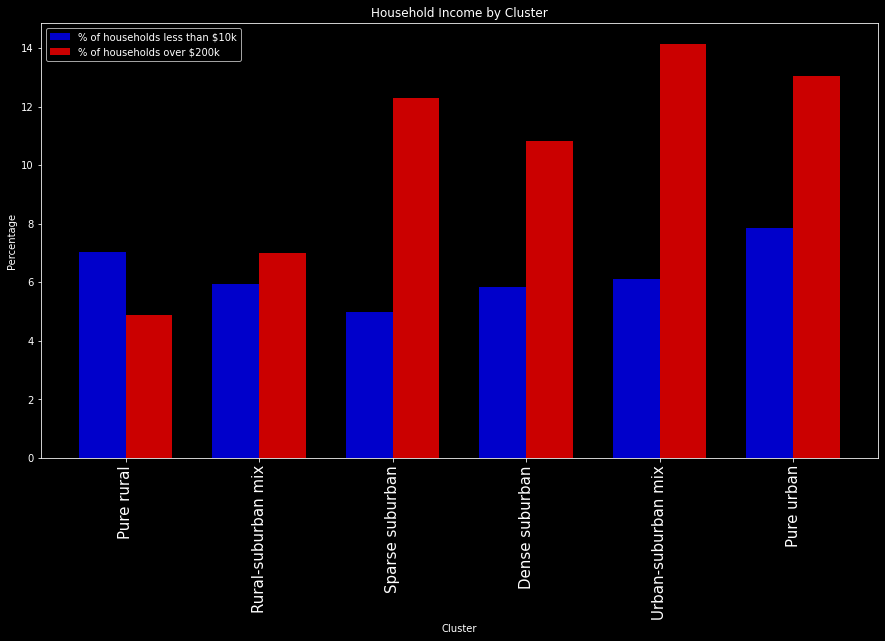

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(final_df['Cluster']))

# Plot the first bar for each cluster
bar1 = ax.bar(index - bar_width/2, final_df['% of households less than $10k'], bar_width, alpha=opacity, color='b', label='% of households less than $10k')

# Plot the second bar for each cluster
bar2 = ax.bar(index + bar_width/2, final_df['% of households over $200k'], bar_width, alpha=opacity, color='r', label='% of households over $200k')

# Add labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Percentage')
ax.set_title('Household Income by Cluster')
ax.set_xticks(index)
ax.set_xticklabels(final_df['Cluster'], fontsize=15, rotation=90)
ax.legend()

Conclusion: We can see from the graph that as the congressional districts become more densely populated, the percentage of households earning over 200k increase. However,  the percentage of households earning less than 10k remains somewhat consta